In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import sys 
from sklearn.impute import SimpleImputer
import random
from plotly.offline import iplot
from plotnine import ggplot, aes, geom_line, geom_bar, geom_point, labs, coord_flip, theme_xkcd, geom_smooth
import json 
import warnings 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

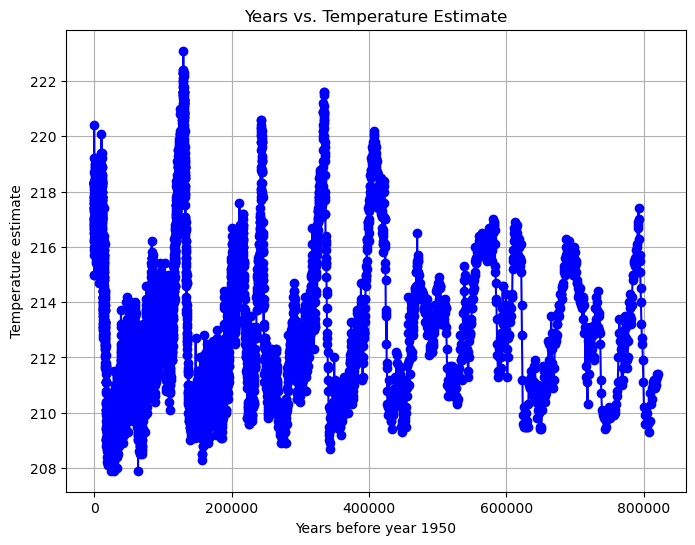

In [2]:
epica = pd.read_excel('data/epicaDC.deuttemp.EDC3-AICC.xls')

# Extracting columns 3 (EDC3 age scale) and 5 (Temperature estimate)
edc3_age = epica['EDC3béta']
temperature_estimate = epica['temp']

# Plotting the data
plt.figure(figsize=(8, 6))
plt.plot(edc3_age, temperature_estimate, marker='o', linestyle='-', color='blue')
plt.xlabel('Years before year 1950')
plt.ylabel('Temperature estimate')
plt.title('Years vs. Temperature Estimate')
plt.grid(True)
plt.show()

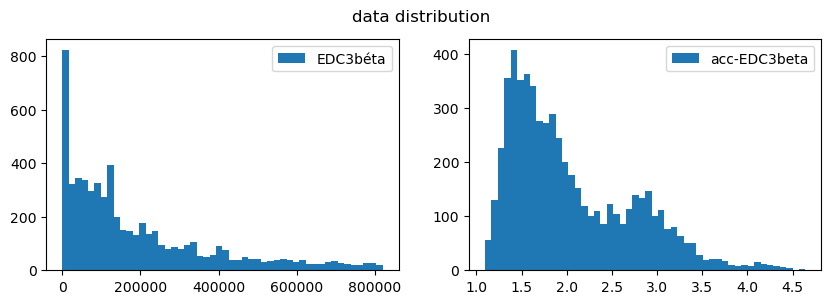

In [3]:
fig, axs = plt.subplots(1,2, figsize=(10,3)) # 1 row, 3 columns
axs[0].hist(epica['EDC3béta'],label="EDC3béta",bins=50)
axs[0].legend()

axs[1].hist(epica['acc-EDC3beta'],label="acc-EDC3beta", bins=50)
axs[1].legend()
plt.suptitle("data distribution")
plt.show()

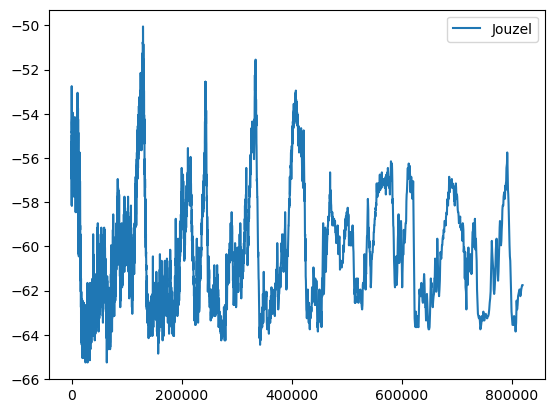

In [4]:
jouzel =pd.read_csv('data/jouzel.csv',encoding='Latin')

def kelvin_to_celsius(temp):
    return temp - 273.15
jouzel['celsius'] = jouzel['temp'].apply(kelvin_to_celsius)
plt.plot(jouzel['EDC3béta'],jouzel['celsius'], label = 'Jouzel')

plt.legend()
plt.show()

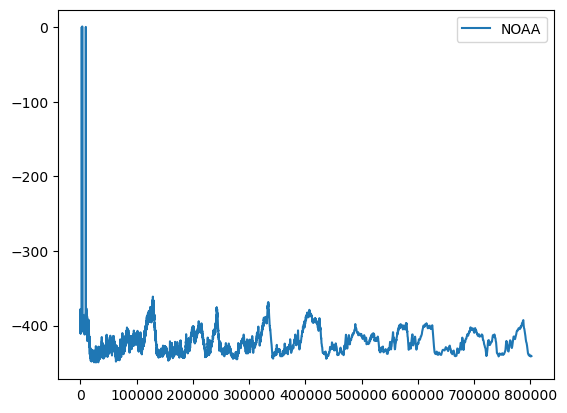

In [5]:
noaa =pd.read_csv('data/Temp data NOAA.csv',skiprows=range(91),delimiter=r"\s+")
plt.plot(noaa['Age'],noaa['Deuterium'], label = 'NOAA')
plt.legend()
plt.show()

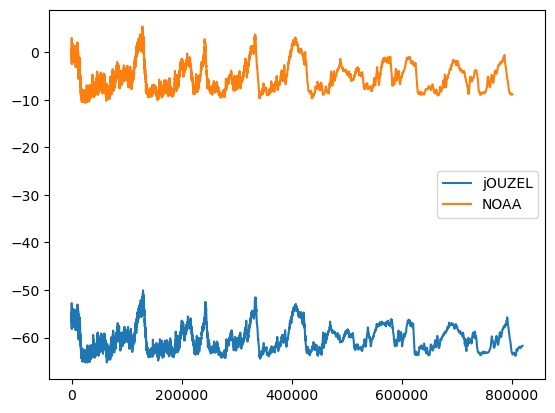

In [6]:
plt.plot(jouzel['EDC3béta'],jouzel['celsius'], label = 'jOUZEL')
plt.plot(noaa['Age'],noaa['Temperature'], label = 'NOAA')
plt.legend()
plt.show()

# CO2

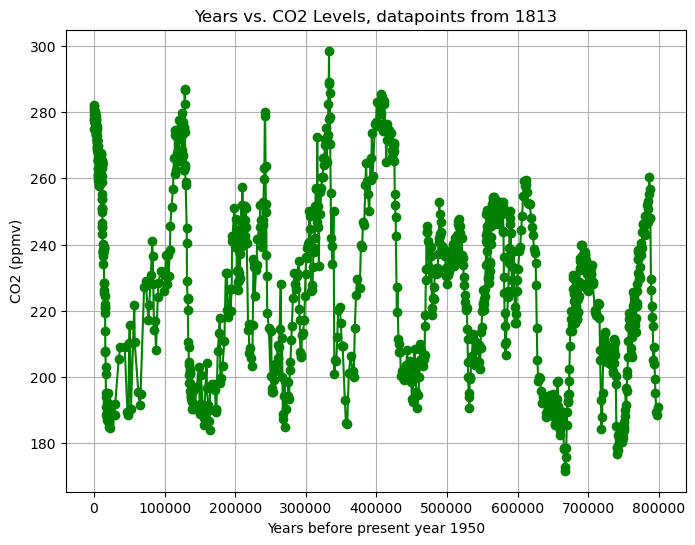

In [7]:
nature = pd.read_excel('data/C02 Nature Paper.xlsx', skiprows=6, sheet_name='3.  Composite CO2')

# Handling NaN values (if any)
nature.dropna(subset=['EDC3_gas_a (yr)', 'CO2 (ppmv)'], inplace=True)

# Extract data from the first two columns
years = nature['EDC3_gas_a (yr)']
co2 = nature['CO2 (ppmv)']

# Plotting the extracted data with the same formatting
plt.figure(figsize=(8, 6))
plt.plot(years, co2, marker='o', linestyle='-', color='green')
plt.xlabel('Years before present year 1950')
plt.ylabel('CO2 (ppmv)')
plt.title('Years vs. CO2 Levels, datapoints from 1813')
plt.grid(True)
plt.show()

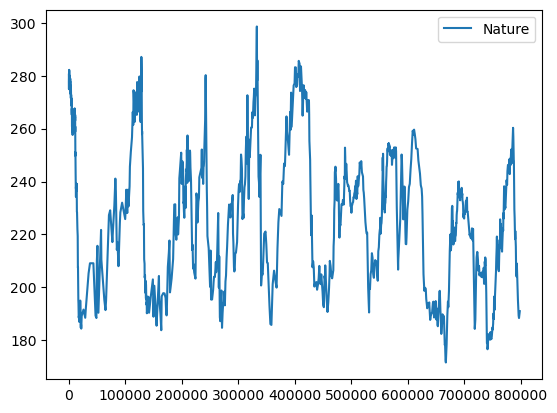

In [8]:
plt.plot(nature['EDC3_gas_a (yr)'],nature['CO2 (ppmv)'], label = 'Nature')
plt.legend()
plt.show()

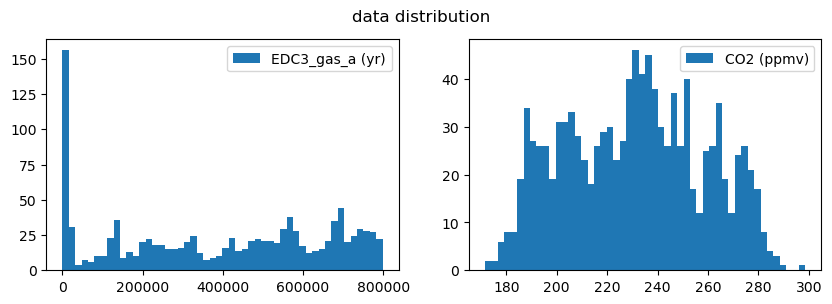

In [9]:
fig, axs = plt.subplots(1,2, figsize=(10,3)) # 1 row, 3 columns
# Age
axs[0].hist(nature['EDC3_gas_a (yr)'],label="EDC3_gas_a (yr)",bins=50)
axs[0].legend()
# Temperature
axs[1].hist(nature['CO2 (ppmv)'],label="CO2 (ppmv)", bins=50)
axs[1].legend()
plt.suptitle("data distribution")
plt.show()

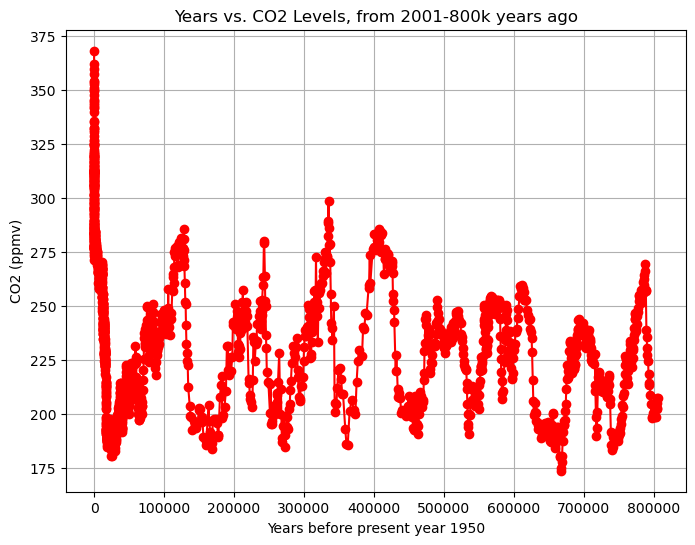

In [10]:
grl = pd.read_excel('data/grl52461-sup-0003-supplementary.xlsx', skiprows=14, sheet_name='CO2 Composite')

# Handling NaN values (if any)
grl.dropna(subset=['Gasage (yr BP) ', 'CO2 (ppmv)'], inplace=True)

# Extract data from the first two columns
Gasage = grl['Gasage (yr BP) ']
co22 = grl['CO2 (ppmv)']

# Plotting the extracted data with the same formatting
plt.figure(figsize=(8, 6))
plt.plot(Gasage, co22, marker='o', linestyle='-', color='red')
plt.xlabel('Years before present year 1950')
plt.ylabel('CO2 (ppmv)')
plt.title('Years vs. CO2 Levels, from 2001-800k years ago')
plt.grid(True)
plt.show()

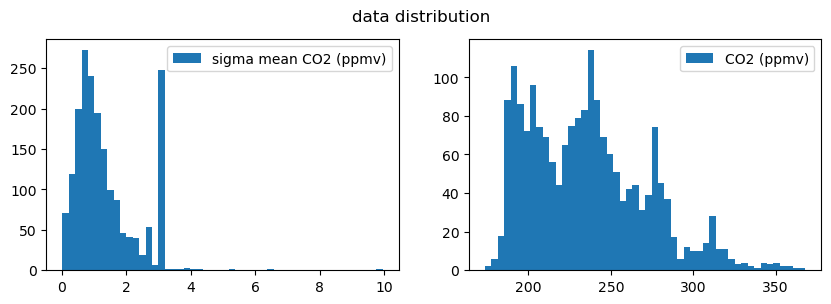

In [11]:
fig, axs = plt.subplots(1,2, figsize=(10,3)) # 1 row, 3 columns
axs[0].hist(grl['sigma mean CO2 (ppmv)'],label="sigma mean CO2 (ppmv)",bins=50)
axs[0].legend()
axs[1].hist(grl['CO2 (ppmv)'],label="CO2 (ppmv)", bins=50)
axs[1].legend()
plt.suptitle("data distribution")
plt.show()

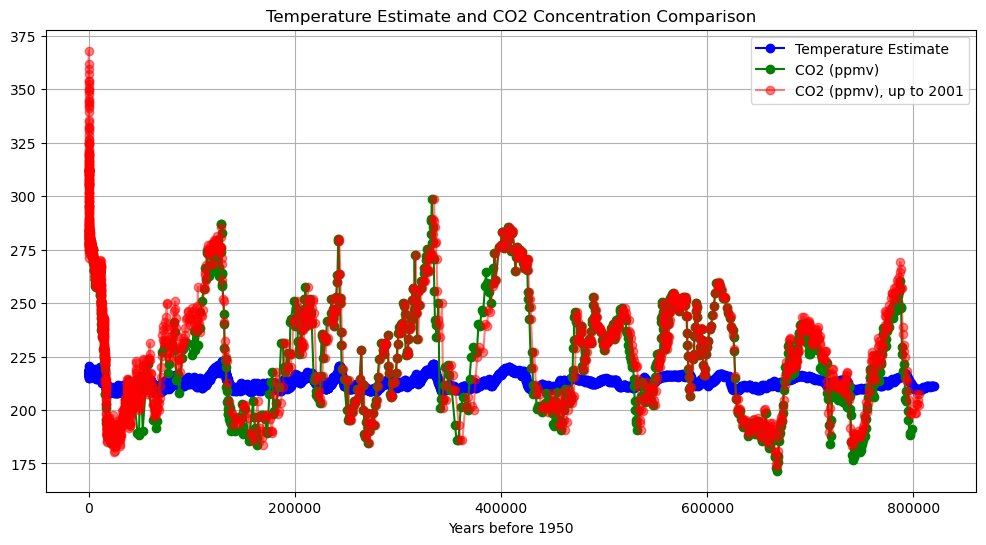

In [12]:
plt.figure(figsize=(12, 6))

# Plotting the first dataset
plt.plot(edc3_age, temperature_estimate, marker='o', linestyle='-', color='blue', label='Temperature Estimate')

# Plotting the second dataset
plt.plot(years, co2, marker='o', linestyle='-', color='green', label='CO2 (ppmv)')

# Plotting the third dataset
plt.plot(Gasage, co22, marker='o', linestyle='-', color='red', label='CO2 (ppmv), up to 2001', alpha=0.5)

plt.xlabel('Years before 1950')
plt.grid(True)
plt.legend()
plt.title('Temperature Estimate and CO2 Concentration Comparison')
plt.show()

# polar ice
Polar Ice. form part of the debate on climate change, Polar ice arises when sea water freezes, polar Ice covers 7% of the earths surface and it also covers 12% of the worlds oceans and according to According to the National Snow Ice and Data Center (NSIDC), sea ice covers just over 9.6 million square miles of the Earth. That's about 2.5 times the size of Canada!. Polar ice helps to regulate heat. It insulates the relatively warm ocean water from the cold polar atmosphere except where cracks, or leads, in the ice allow exchange of heat and water vapor from ocean to atmosphere in winter. The number of leads determines where and how much heat and water are lost to the atmosphere, which may affect local cloud cover and precipitation. As sea ice extent shrinks and breaks up, exposed ocean waters increase.

In 1979, satellites started monitoring sea ice, to keep an eye on how much of it there was. This has raised alarm NSIDC reported that in January 2017, there was about 5.17 million square miles of Arctic sea ice recorded. This was the lowest recorded amount since 1979. In fact, it's 100,000 square miles less Arctic sea ice than there was in January 2016.

This means that as this ice begins to melt and disapper water levels will begin to rise and this gives rise to flooding. Warmer temperatures in the Arctic and the Antarctic can also affect how the world's atmosphere behaves, as air moves around the Earth. There is one other factor at play here the question of wildlife, Polar bears seals penguins all need this ice to live. if it disappers and reduces year and year. they are also at risk.

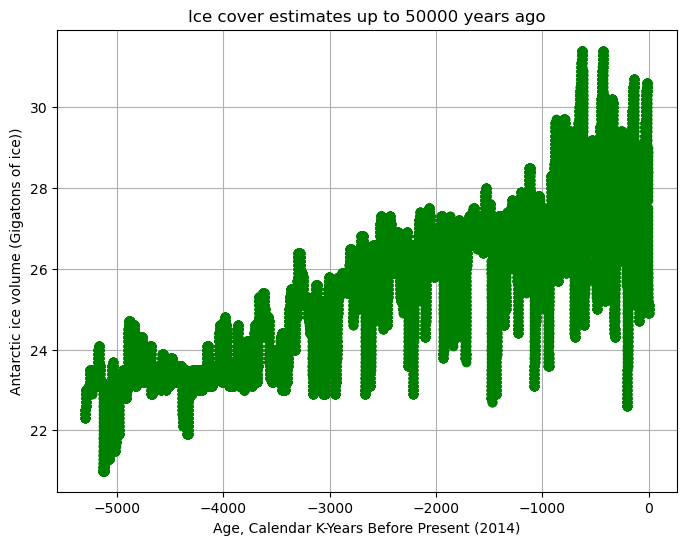

In [13]:
seaice = pd.read_csv('data/deboer2014.txt', delimiter='\t', na_values=-999, skiprows=114)
year = seaice['age_calkaBP']
ice_volume = seaice['AnIS-V']

# Plotting the extracted data
plt.figure(figsize=(8, 6))
plt.plot(year, ice_volume,  marker='o', color='green')
plt.xlabel('Age, Calendar K-Years Before Present (2014)')  
plt.ylabel('Antarctic ice volume (Gigatons of ice))')  
plt.title('Ice cover estimates up to 50000 years ago')
plt.grid(True)
plt.show()

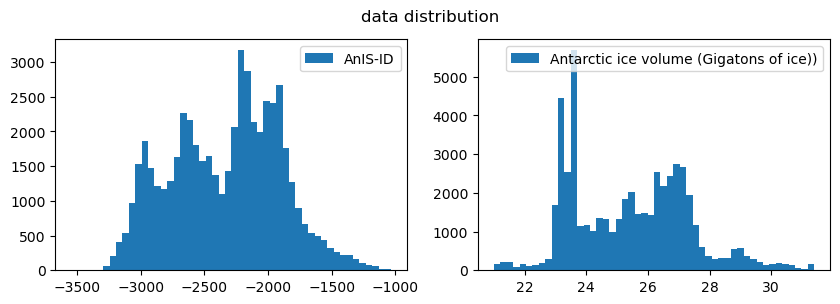

In [14]:
fig, axs = plt.subplots(1,2, figsize=(10,3)) # 1 row, 3 columns
axs[0].hist(seaice['AnIS-ID'],label="AnIS-ID",bins=50)
axs[0].legend()
axs[1].hist(seaice['AnIS-V'],label="Antarctic ice volume (Gigatons of ice))", bins=50)
axs[1].legend()
plt.suptitle("data distribution")
plt.show()

# rainfall in Ireland

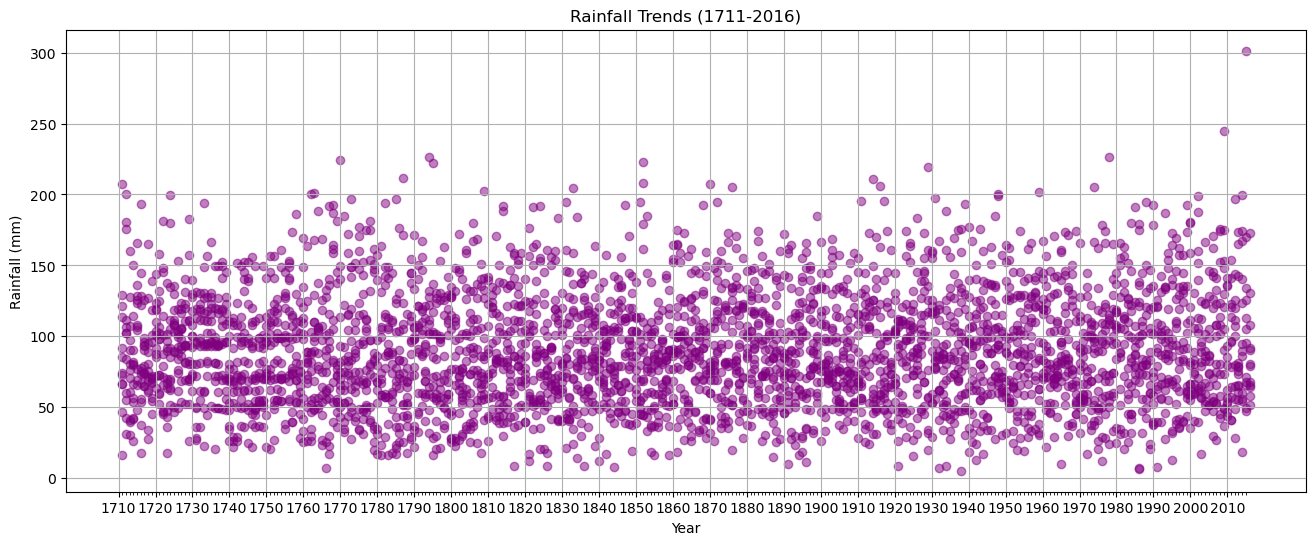

In [15]:
Irish_rainfall = pd.read_csv('data/Rainfall.CSV')
plt.figure(figsize=(16, 6))
ax = plt.gca()

# Plotting the data as individual points
plt.scatter(Irish_rainfall['Year'], Irish_rainfall['Median montly series'], color='purple', alpha=0.5)

# Set x-axis major ticks every 10 years
major_ticks = range(1710, 2017, 10)
ax.set_xticks(major_ticks)

# Set minor ticks between major ticks
minor_ticks = range(1711, 2016, 1)
ax.set_xticks(minor_ticks, minor=True)

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Rainfall (mm)')
plt.title('Rainfall Trends (1711-2016)')

# Show grid and plot
plt.grid(True)
plt.show()

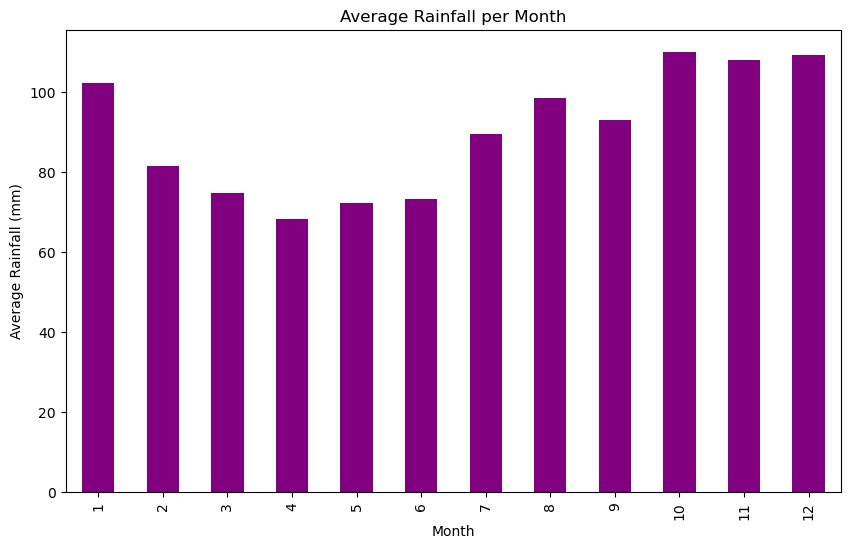

In [16]:
monthly_rainfall = Irish_rainfall.groupby('Month')['Median montly series'].mean()

plt.figure(figsize=(10, 6))
monthly_rainfall.plot(kind='bar', color='purple')
plt.xlabel('Month')
plt.ylabel('Average Rainfall (mm)')
plt.title('Average Rainfall per Month')
plt.show()

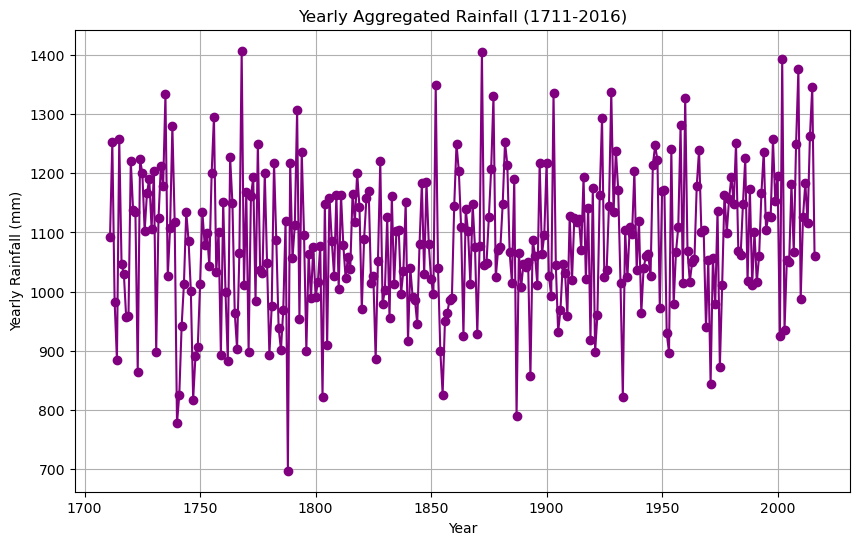

In [17]:
Irish_rainfall['Date'] = pd.to_datetime(Irish_rainfall[['Year', 'Month']].assign(day=1))


yearly_rainfall = Irish_rainfall.groupby(Irish_rainfall['Date'].dt.year)['Median montly series'].sum()


plt.figure(figsize=(10, 6))
plt.plot(yearly_rainfall.index, yearly_rainfall.values, marker='o', linestyle='-', color='purple')
plt.xlabel('Year')
plt.ylabel('Yearly Rainfall (mm)')
plt.title('Yearly Aggregated Rainfall (1711-2016)')
plt.grid(True)
plt.show()

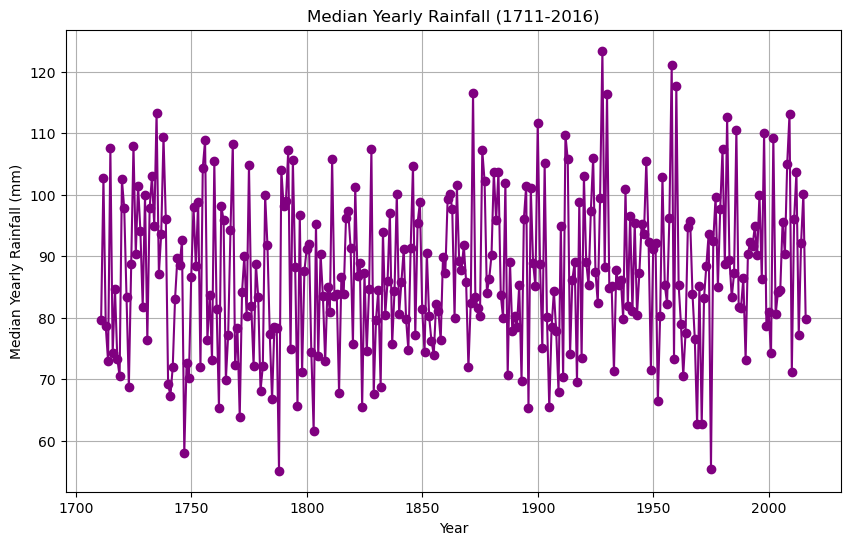

In [18]:
Irish_rainfall['Date'] = pd.to_datetime(Irish_rainfall[['Year', 'Month']].assign(day=1))

# Calculate median yearly rainfall
yearly_median_rainfall = Irish_rainfall.groupby(Irish_rainfall['Date'].dt.year)['Median montly series'].median()

# Plot the median yearly rainfall data
plt.figure(figsize=(10, 6))
plt.plot(yearly_median_rainfall.index, yearly_median_rainfall.values, marker='o',  color='purple')
plt.xlabel('Year')
plt.ylabel('Median Yearly Rainfall (mm)')
plt.title('Median Yearly Rainfall (1711-2016)')
plt.grid(True)
plt.show()

In [19]:
yearly_rainfall_dataset = yearly_rainfall.reset_index()
yearly_rainfall_dataset.columns = ['Year', 'Rainfall']

yearly_rainfall_dataset.to_csv('data/yearly_totalrainfall.csv', index=False)
yearly_median_rainfall_dataset = yearly_median_rainfall.reset_index()
yearly_median_rainfall_dataset.columns = ['Year', 'Median rainfall']


yearly_median_rainfall_dataset.to_csv('data/yearly_medianrainfall.csv', index=False)

In [20]:
result=pd.concat([nature,grl,jouzel,noaa,epica],axis =1)
print(result)

      EDC3_gas_a (yr)  CO2 (ppmv)  Gasage (yr BP)   CO2 (ppmv)  \
0               137.0       280.4       -51.030000  368.022488   
1               268.0       274.9       -48.000000  361.780737   
2               279.0       277.9       -46.279272  359.647793   
3               395.0       279.1       -44.405642  357.106740   
4               404.0       281.9       -43.080000  353.946685   
...               ...         ...              ...         ...   
5814              NaN         NaN              NaN         NaN   
5815              NaN         NaN              NaN         NaN   
5816              NaN         NaN              NaN         NaN   
5817              NaN         NaN              NaN         NaN   
5818              NaN         NaN              NaN         NaN   

      sigma mean CO2 (ppmv)   bag     ztop      EDC3béta       AICC2012  \
0                  0.060442     1     0.00     -50.00000     -55.000000   
1                  0.370000     2     0.55     -43.55977 